In [1]:
import pyteomics
import lxml
from pyteomics import mzml, mass
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib
import seaborn as sns
import re

In [2]:
sample=[0,2,3,4]
def remove_dul(tar_list=sample):
    res=[]
    [res.append(x) for x in tar_list if x not in res]
    return(res)

In [3]:
#  import the quantification files of all NPs and DD

dir = "F:\\Seer_project"

plasma_pro = []
plasma_pep = []

for file in os.listdir(dir):
    if 'common_proteins' in file:
        plasma_pro.append(os.path.join(dir, file))
    if 'common_peptides' in file:
        plasma_pep.append(os.path.join(dir, file))

plasma_pep


['F:\\Seer_project\\common_peptides_dd.csv',
 'F:\\Seer_project\\common_peptides_np1.csv',
 'F:\\Seer_project\\common_peptides_np2.csv',
 'F:\\Seer_project\\common_peptides_np3.csv',
 'F:\\Seer_project\\common_peptides_np4.csv',
 'F:\\Seer_project\\common_peptides_np5.csv']

In [4]:
def make_lists_pro_pep(filenames=plasma_pro):
    '''put all proteins or peptides from each NP to a lists in list'''    
    dataframes = []

    for name in filenames:
        df = pd.read_csv(name)
        df.set_index('Unnamed: 0', inplace=True)
        dataframes.append(df)

    pro_dd, pro_np1, pro_np2, pro_np3, pro_np4, pro_np5 = dataframes
    list_dd=pro_dd.index.tolist()
    list_np1=pro_np1.index.tolist()
    list_np2=pro_np2.index.tolist()
    list_np3=pro_np3.index.tolist()
    list_np4=pro_np4.index.tolist()
    list_np5=pro_np5.index.tolist()
    toge_all=[list_dd,list_np1,list_np2,list_np3,list_np4,list_np5]
    return(toge_all)


In [5]:
toge_pro = make_lists_pro_pep(filenames=plasma_pro)
toge_pep = make_lists_pro_pep(filenames=plasma_pep)

In [6]:
def cal_any_ratios(values=toge_pro,n=2):
    '''calculate the length ratio of any n lists in a list to the original list'''
    from itertools import combinations    
    # get all values from the input list and remove duplicates
    total = remove_dul(tar_list=[item for sublist in values for item in sublist])
    results = []

    # Iterate over each combination of n values in the list
    for group in combinations(values, n):
        unique_group_values = list(set(item for sublist in group for item in sublist))
        #unique_group_values =remove_dul(tar_list=list(item for sublist in group for item in sublist))
        ratio = len(unique_group_values) / len(total)
        indices = [values.index(sublist) for sublist in group]
        results.append((indices, ratio))
    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['Group', 'Ratio'])
    df.set_index('Group',inplace=True)
    return(df)  


 

In [7]:
df_bio=pd.read_csv(r'F:\\Seer_project\\R_data\\chord_diagram_biomarkers2.csv')
df_bio.set_index('Item',inplace=True)

In [8]:

bio_dd=df_bio[df_bio['DD']==1].index.tolist()
bio_np1=df_bio[df_bio['NP1']==1].index.tolist()
bio_np2=df_bio[df_bio['NP2']==1].index.tolist()
bio_np3=df_bio[df_bio['NP3']==1].index.tolist()
bio_np4=df_bio[df_bio['NP4']==1].index.tolist()
bio_np5=df_bio[df_bio['NP5']==1].index.tolist()

toge_bio=[bio_dd,bio_np1,bio_np2,bio_np3,bio_np4,bio_np5]

In [9]:
Intensity=[17.442438, 17.112451, 17.010393, 17.677678, 17.361636, 17.457459]
Quan=[0.4, 0.62, 0.64, 0.44, 0.85, 0.71]
CV=[0.06729475100942127,0.05672149744753262,0.06053268765133172,0.07251631617113852,0.04681647940074907,0.04819277108433735]

In [11]:
def cal_list_means(values=Intensity,n=2):
    '''calculate the mean value of any n values in a list'''   
    from itertools import combinations
    results = []
    # Iterate over each combination of n values in the list
    for group in combinations(values, n):
        sumvalue = sum(item for item in group)
        means = sumvalue / len(group)
        indices = [values.index(item) for item in group]
        results.append((indices, means))
    # Convert the results to a DataFrame
    df = pd.DataFrame(results, columns=['Group', 'Ratio'])
    df.set_index('Group',inplace=True)
    return(df) 

In [70]:
i=2

dfbio_2=cal_any_ratios(values=toge_bio,n=i).rename({'Ratio': 'Biomarker'}, axis=1)
dfpep_2=cal_any_ratios(values=toge_pep,n=i).rename({'Ratio': 'Peptide'}, axis=1)
dfpro_2=cal_any_ratios(values=toge_pro,n=i).rename({'Ratio': 'Protein'}, axis=1)
dfinten_2=cal_list_means(values=Intensity,n=i).rename({'Ratio': 'Intensity'}, axis=1)
dfquan_2=cal_list_means(values=Quan,n=i).rename({'Ratio': 'Quan'}, axis=1)
dfcv_2=cal_list_means(values=CV,n=i).rename({'Ratio': 'CV'}, axis=1)

In [71]:
# merge dataframes

all_toge2 = pd.concat([dfpro_2,dfbio_2,dfpep_2, dfinten_2,dfquan_2,dfcv_2], axis=1)

In [72]:
all_toge2

,Protein,Biomarker,Peptide,Intensity,Quan,CV
Group,,,,,,
"[0, 1]",0.656885,0.840909,0.519248,17.277445,0.510,0.062008
"[0, 2]",0.738149,0.886364,0.586159,17.226416,0.520,0.063914
"[0, 3]",0.683973,0.863636,0.618698,17.560058,0.420,0.069906
"[0, 4]",0.645598,0.863636,0.545371,17.402037,0.625,0.057056
"[0, 5]",0.729120,0.840909,0.615032,17.449948,0.555,0.057744
"[1, 2]",0.683973,0.954545,0.572411,17.061422,0.630,0.058627
"[1, 3]",0.559819,0.772727,0.541705,17.395065,0.530,0.064619
"[1, 4]",0.568849,0.818182,0.495875,17.237043,0.735,0.051769
"[1, 5]",0.652370,0.818182,0.579743,17.284955,0.665,0.052457


In [73]:
# apply standard scaler to the ratar dataframe 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(all_toge2)

# Convert scaled data back to DataFrame for better visualization and to retain column names
normalized = pd.DataFrame(scaled_data, columns=all_toge2.columns,index=all_toge2.index)
normalized

,Protein,Biomarker,Peptide,Intensity,Quan,CV
Group,,,,,,
"[0, 1]",0.505882,0.333333,0.130102,0.426798,0.250000,0.647451
"[0, 2]",0.929412,0.555556,0.502551,0.325980,0.277778,0.732519
"[0, 3]",0.647059,0.444444,0.683673,0.985161,0.000000,1.000000
"[0, 4]",0.447059,0.444444,0.275510,0.672957,0.569444,0.426366
"[0, 5]",0.882353,0.333333,0.663265,0.767617,0.375000,0.457086
"[1, 2]",0.647059,0.888889,0.426020,0.000000,0.583333,0.496519
"[1, 3]",0.000000,0.000000,0.255102,0.659182,0.305556,0.763999
"[1, 4]",0.047059,0.222222,0.000000,0.346978,0.875000,0.190366
"[1, 5]",0.482353,0.222222,0.466837,0.441637,0.680556,0.221085


In [74]:
# calculate the final score of any combination

A,B,C,D,E,F=0.15, 0.2, 0.15, 0.2, 0.1, 0.2    # define the weight
df = normalized
scores=[]
for i in range(len(df)):
    score=df.CV[i]*A+df.Biomarker[i]*B+df.Peptide[i]*C+df.Protein[i]*D+df.Intensity[i]*E+df.Quan[i]*F
    scores.append(score)
scores

[0.37715598689580654,
 0.5704075165828568,
 0.5693678150806656,
 0.46476673526245166,
 0.5629515808636758,
 0.5622370580669354,
 0.2798945020896213,
 0.2921088150952028,
 0.4243781278166093,
 0.7948885621221429,
 0.7115044690986462,
 0.5646477980932286,
 0.47032171037356735,
 0.6686921302044833,
 0.6078440515867498]

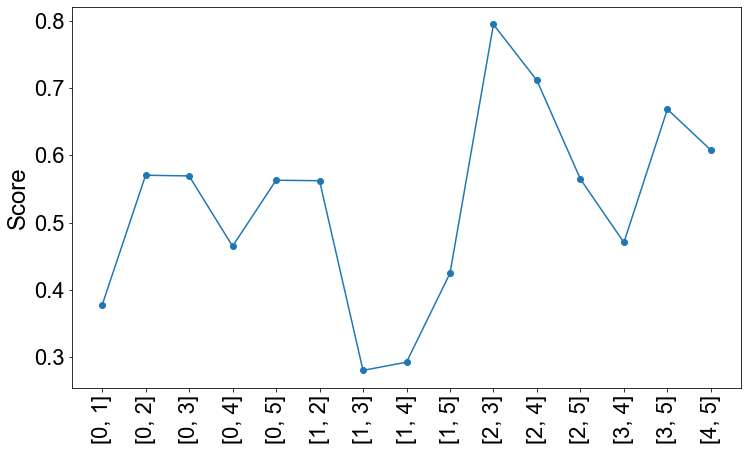

In [75]:

import matplotlib as mpl

# Set global font
mpl.rcParams['font.family'] = 'Arial'

plt.rcParams['figure.figsize']=(12,7)

# Define the data
x = [str(item) for item in df.index]
y = scores

# Create the plot
plt.plot(x, y, marker='o')
# Rotate x-axis labels
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22)
#plt.xlabel('X-axis', fontsize=26)
plt.ylabel('Score',fontsize=24)
#plt.title('Simple Line Plot')



#plt.savefig('F:\\Seer_project\\figures\\combination analysis\\4nps.svg', dpi=800,bbox_inches='tight')

plt.show()

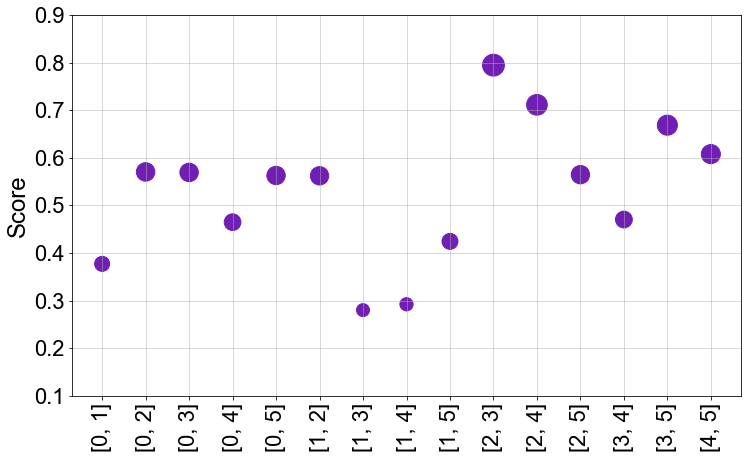

In [77]:
# Create bubble plot
z=np.array(y)*600

plt.figure(figsize=(12, 7))
bubble = plt.scatter(x, y, s=z,color='#701EB3')

# Adding titles and labels
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22)
#plt.xlabel('X-axis', fontsize=26)
plt.ylabel('Score',fontsize=24)
plt.ylim(0.1,0.9)
plt.savefig('F:\\Seer_project\\figures\\combination analysis\\2nps_bubble.svg', dpi=800,bbox_inches='tight')
# Show plot
plt.grid(True, alpha=0.6)
plt.show()

In [66]:
df.index=['DD','NP1','NP2','NP3','NP4','NP5']

ValueError: Length mismatch: Expected axis has 15 elements, new values have 6 elements

In [262]:
df

,Protein,Biomarker,Peptide,Intensity,Quan,CV
DD,0.129032,0.333333,0.000000,0.647467,0.000000,0.796825
NP1,0.000000,0.000000,0.076087,0.152945,0.488889,0.385412
NP2,1.000000,1.000000,0.746377,0.000000,0.533333,0.533708
NP3,0.500000,0.444444,0.996377,1.000000,0.088889,1.000000
NP4,0.387097,0.444444,0.474638,0.526376,1.000000,0.000000
NP5,0.887097,0.444444,1.000000,0.669978,0.688889,0.053553


In [263]:
df_radar=pd.read_excel(r'F:\\Seer_project\\test.xlsx',sheet_name='Sheet2')
df_radar.set_index('Unnamed: 0',inplace=True)

In [264]:
df_radar.iloc[:,0].tolist()

[0.06729475100942127,
 0.05672149744753262,
 0.06053268765133172,
 0.07251631617113852,
 0.04681647940074907,
 0.04819277108433735]

In [265]:
# apply standard scaler to the ratar dataframe 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_radar)

# Convert scaled data back to DataFrame for better visualization and to retain column names
normalized_df_radar = pd.DataFrame(scaled_data, columns=df_radar.columns,index=df_radar.index)
normalized_df_radar

,1/CV,Biomarker,Peptide,Protein,Intensity,Quan
Unnamed: 0,,,,,,
DD,0.796825,0.35,0.000000,0.071429,0.647467,0.000000
NP1,0.385412,0.00,0.076923,0.000000,0.152945,0.488889
NP2,0.533708,1.00,0.769231,1.000000,0.000000,0.533333
NP3,1.000000,0.45,1.000000,0.500000,1.000000,0.088889
NP4,0.000000,0.45,0.461538,0.357143,0.526376,1.000000
NP5,0.053553,0.45,1.000000,0.857143,0.669978,0.688889


In [267]:
normalized_df_radar.to_csv(r'F:\\Seer_project\\R_data\\radar3.csv')

In [168]:
df=normalized_df_radar
df = df.rename({'1/CV': 'CV'}, axis=1)



[0.14134742404227207,
 0.5072655217965654,
 0.36063408190224555,
 0.0,
 1.0,
 0.919418758256275]

In [159]:
df.Intensity

Unnamed: 0
DD     0.647467
NP1    0.152945
NP2    0.000000
NP3    1.000000
NP4    0.526376
NP5    0.669978
Name: Intensity, dtype: float64

In [160]:
A,B,C,D,E,F=0.15, 0.2, 0.15, 0.2, 0.1, 0.2

scores=[]
for i in range(6):
    score=df.CV[i]*A+df.Biomarker[i]*B+df.Peptide[i]*C+df.Protein[i]*D+df.Intensity[i]*E+df.Quan[i]*F
    scores.append(score)
scores

[0.17023452533018096,
 0.2007005819236756,
 0.6761463943366188,
 0.45777777777777773,
 0.6332969692588145,
 0.7541169225227816]

In [12]:
def get_pro_names(protein = pro_np1):
    sample  = []
    for i in protein.index.tolist():
        sample.append(i.split('|')[1])
    return(sample)

In [13]:
len(get_pro_names(protein = pro_np2))

246

In [60]:
def get_zip(df=pro_dd):
    '''get the index ("protein name") and ion counts value into a new list from csodiaq outputs' dataframe'''
    newlist = []
    # Using zip to iterate through two lists simultaneously
    for protein, ionCount in zip(df.index.tolist(), df['mean'].tolist()):
        newlist.append([protein, ionCount])
    return(newlist)

In [61]:
list1 = get_zip(df=pro_dd)
list2 = get_zip(df=pro_np1)
list3 = get_zip(df=pro_np2)
list4 = get_zip(df=pro_np3)
list5 = get_zip(df=pro_np4)
list6 = get_zip(df=pro_np5)

# Convert lists to dictionaries
dict1 = dict(list1)
dict2 = dict(list2)
dict3 = dict(list3)
dict4 = dict(list4)
dict5 = dict(list5)
dict6 = dict(list6)

# Fetch unique keys (indices) from both dictionaries
all_keys = set(dict1.keys()) | set(dict2.keys()) | set(dict3.keys()) | set(dict4.keys()) | set(dict5.keys()) | set(dict6.keys())

# Merge lists based on keys
merged_list = []
for key in sorted(all_keys):
    value1 = dict1.get(key, float('nan'))
    value2 = dict2.get(key, float('nan'))
    value3 = dict3.get(key, float('nan'))
    value4 = dict4.get(key, float('nan'))
    value5 = dict5.get(key, float('nan'))
    value6 = dict6.get(key, float('nan'))
    merged_list.append([key, value1, value2, value3, value4, value5, value6])

print(merged_list) 

[['1/DECOY_0_sp|P00734|THRB_HUMAN', nan, nan, nan, nan, nan, 52039.24308268229], ['1/DECOY_0_sp|P01024|CO3_HUMAN', nan, nan, 12556.77482096354, nan, nan, nan], ['1/DECOY_0_sp|P33908|MA1A1_HUMAN', nan, nan, nan, nan, 51844.54307047526, nan], ['1/DECOY_0_sp|Q15113|PCOC1_HUMAN', nan, 50597.26041666666, nan, 72750.30996704102, nan, nan], ['1/contam_sp|P00761|TRYP_PIG', 7413207.20316569, 15367264.986002604, 9889607.717041016, 5399295.966369629, 10762092.726460775, 14171315.8037618], ['1/contam_sp|P02769|ALBU_BOVIN', 195587.4834696452, nan, nan, nan, nan, nan], ['1/sp|A0A075B6I0|LV861_HUMAN', nan, nan, nan, nan, 38925.360219319664, nan], ['1/sp|A0A0A0MS15|HV349_HUMAN', 31178.806854248047, nan, nan, nan, nan, nan], ['1/sp|A0A0B4J1U7|HV601_HUMAN', 32667.900329589844, nan, nan, nan, nan, nan], ['1/sp|A0A0B4J1V0|HV315_HUMAN', 41893.52231852213, nan, nan, nan, 27761.213267008465, nan], ['1/sp|A0A0B4J1X8|HV343_HUMAN', 20125.792704264324, nan, nan, nan, nan, nan], ['1/sp|A0A0B4J1Y9|HV372_HUMAN', 10

In [62]:
data_list=merged_list
# Splitting indices and data
indices = [item[0] for item in data_list]
data = [item[1:] for item in data_list]

# Creating DataFrame
newdf = pd.DataFrame(data, index=indices, columns=['DD', 'NP1','NP2','NP3','NP4','NP5'])

newdf

,DD,NP1,NP2,NP3,NP4,NP5
1/DECOY_0_sp|P00734|THRB_HUMAN,NaN,NaN,NaN,NaN,NaN,5.203924e+04
1/DECOY_0_sp|P01024|CO3_HUMAN,NaN,NaN,1.255677e+04,NaN,NaN,NaN
1/DECOY_0_sp|P33908|MA1A1_HUMAN,NaN,NaN,NaN,NaN,5.184454e+04,NaN
1/DECOY_0_sp|Q15113|PCOC1_HUMAN,NaN,5.059726e+04,NaN,7.275031e+04,NaN,NaN
1/contam_sp|P00761|TRYP_PIG,7.413207e+06,1.536726e+07,9.889608e+06,5.399296e+06,1.076209e+07,1.417132e+07
...,...,...,...,...,...,...
9/sp|P06310|KV230_HUMAN/sp|P01615|KVD28_HUMAN/sp|P01614|KVD40_HUMAN/sp|A2NJV5|KV229_HUMAN/sp|A0A0A0MRZ7|KVD26_HUMAN/sp|A0A087WW87|KV240_HUMAN/sp|A0A075B6S6|KVD30_HUMAN/sp|A0A075B6S2|KVD29_HUMAN/sp|A0A075B6P5|KV228_HUMAN,1.720499e+05,2.207933e+04,1.981135e+04,4.943015e+04,3.007289e+04,6.427683e+04
9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/sp|P01780|HV307_HUMAN/sp|P01766|HV313_HUMAN/sp|P01763|HV348_HUMAN/sp|P01762|HV311_HUMAN/sp|A0A0C4DH32|HV320_HUMAN/sp|A0A0B4J1X8|HV343_HUMAN/sp|A0A0B4J1V1|HV321_HUMAN,7.436521e+04,3.031388e+04,NaN,4.459324e+04,NaN,NaN
9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/sp|P0DP06|HVD34_HUMAN/sp|P06331|HV434_HUMAN/sp|P01825|HV459_HUMAN/sp|P01824|HV439_HUMAN/sp|A0A0C4DH41|HV461_HUMAN/sp|A0A087WSY4|HV432_HUMAN/sp|A0A075B6R2|HV404_HUMAN,7.814745e+04,NaN,NaN,1.531698e+05,4.515693e+04,NaN
9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|P62807|H2B1C_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P57053|H2BFS_HUMAN/sp|O60814|H2B1K_HUMAN,NaN,NaN,NaN,NaN,1.445661e+04,NaN


In [68]:
uk_log2=np.log2(uk)

In [69]:
uk_log2.mean()

DD     17.442438
NP1    17.112451
NP2    17.010393
NP3    17.677678
NP4    17.361636
NP5    17.457459
dtype: float64

In [63]:
uk=newdf
#um=uk.transpose()
uk_log10=np.log10(uk)
uk_log10

,DD,NP1,NP2,NP3,NP4,NP5
1/DECOY_0_sp|P00734|THRB_HUMAN,NaN,NaN,NaN,NaN,NaN,4.716331
1/DECOY_0_sp|P01024|CO3_HUMAN,NaN,NaN,4.098878,NaN,NaN,NaN
1/DECOY_0_sp|P33908|MA1A1_HUMAN,NaN,NaN,NaN,NaN,4.714703,NaN
1/DECOY_0_sp|Q15113|PCOC1_HUMAN,NaN,4.704127,NaN,4.861835,NaN,NaN
1/contam_sp|P00761|TRYP_PIG,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410
...,...,...,...,...,...,...
9/sp|P06310|KV230_HUMAN/sp|P01615|KVD28_HUMAN/sp|P01614|KVD40_HUMAN/sp|A2NJV5|KV229_HUMAN/sp|A0A0A0MRZ7|KVD26_HUMAN/sp|A0A087WW87|KV240_HUMAN/sp|A0A075B6S6|KVD30_HUMAN/sp|A0A075B6S2|KVD29_HUMAN/sp|A0A075B6P5|KV228_HUMAN,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054
9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/sp|P01780|HV307_HUMAN/sp|P01766|HV313_HUMAN/sp|P01763|HV348_HUMAN/sp|P01762|HV311_HUMAN/sp|A0A0C4DH32|HV320_HUMAN/sp|A0A0B4J1X8|HV343_HUMAN/sp|A0A0B4J1V1|HV321_HUMAN,4.871370,4.481642,NaN,4.649269,NaN,NaN
9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/sp|P0DP06|HVD34_HUMAN/sp|P06331|HV434_HUMAN/sp|P01825|HV459_HUMAN/sp|P01824|HV439_HUMAN/sp|A0A0C4DH41|HV461_HUMAN/sp|A0A087WSY4|HV432_HUMAN/sp|A0A075B6R2|HV404_HUMAN,4.892915,NaN,NaN,5.185173,4.654724,NaN
9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|P62807|H2B1C_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P57053|H2BFS_HUMAN/sp|O60814|H2B1K_HUMAN,NaN,NaN,NaN,NaN,4.160067,NaN


DD     5.250697
NP1    5.151361
NP2    5.120639
NP3    5.321511
NP4    5.226373
NP5    5.255219
dtype: float64

In [12]:
data=uk_log10.fillna(0)


In [13]:
newindex=[item.split('|')[-1].split('_')[0] for item in uk_log10.index]

In [14]:
pro_en=[item.split('|')[1] for item in uk_log10.index]


In [15]:

uk_log10['pro_names']=pro_en
uk_log10['new_index']=newindex

In [16]:
uk_log10

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index
1/DECOY_0_sp|P00734|THRB_HUMAN,NaN,NaN,NaN,NaN,NaN,4.716331,P00734,THRB
1/DECOY_0_sp|P01024|CO3_HUMAN,NaN,NaN,4.098878,NaN,NaN,NaN,P01024,CO3
1/DECOY_0_sp|P33908|MA1A1_HUMAN,NaN,NaN,NaN,NaN,4.714703,NaN,P33908,MA1A1
1/DECOY_0_sp|Q15113|PCOC1_HUMAN,NaN,4.704127,NaN,4.861835,NaN,NaN,Q15113,PCOC1
1/contam_sp|P00761|TRYP_PIG,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,P00761,TRYP
...,...,...,...,...,...,...,...,...
9/sp|P06310|KV230_HUMAN/sp|P01615|KVD28_HUMAN/sp|P01614|KVD40_HUMAN/sp|A2NJV5|KV229_HUMAN/sp|A0A0A0MRZ7|KVD26_HUMAN/sp|A0A087WW87|KV240_HUMAN/sp|A0A075B6S6|KVD30_HUMAN/sp|A0A075B6S2|KVD29_HUMAN/sp|A0A075B6P5|KV228_HUMAN,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,P06310,KV228
9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/sp|P01780|HV307_HUMAN/sp|P01766|HV313_HUMAN/sp|P01763|HV348_HUMAN/sp|P01762|HV311_HUMAN/sp|A0A0C4DH32|HV320_HUMAN/sp|A0A0B4J1X8|HV343_HUMAN/sp|A0A0B4J1V1|HV321_HUMAN,4.871370,4.481642,NaN,4.649269,NaN,NaN,P0DP04,HV321
9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/sp|P0DP06|HVD34_HUMAN/sp|P06331|HV434_HUMAN/sp|P01825|HV459_HUMAN/sp|P01824|HV439_HUMAN/sp|A0A0C4DH41|HV461_HUMAN/sp|A0A087WSY4|HV432_HUMAN/sp|A0A075B6R2|HV404_HUMAN,4.892915,NaN,NaN,5.185173,4.654724,NaN,P0DP08,HV404
9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|P62807|H2B1C_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P57053|H2BFS_HUMAN/sp|O60814|H2B1K_HUMAN,NaN,NaN,NaN,NaN,4.160067,NaN,Q99880,H2B1K


In [17]:
df_biomarker=pd.read_excel(r'F:\\Seer_project\\FDA_biomarkers.xlsx',sheet_name='Sheet3')

In [18]:
biomarker=df_biomarker['biomarkers'].tolist()



In [19]:
#len([item for item in biomarker if item in allpro])

In [20]:
uk_log10['Biomarkers'] = np.where(uk_log10['pro_names'].isin(biomarker), 'yes', 'no')

In [21]:
uk_log10

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,Biomarkers
1/DECOY_0_sp|P00734|THRB_HUMAN,NaN,NaN,NaN,NaN,NaN,4.716331,P00734,THRB,no
1/DECOY_0_sp|P01024|CO3_HUMAN,NaN,NaN,4.098878,NaN,NaN,NaN,P01024,CO3,yes
1/DECOY_0_sp|P33908|MA1A1_HUMAN,NaN,NaN,NaN,NaN,4.714703,NaN,P33908,MA1A1,no
1/DECOY_0_sp|Q15113|PCOC1_HUMAN,NaN,4.704127,NaN,4.861835,NaN,NaN,Q15113,PCOC1,no
1/contam_sp|P00761|TRYP_PIG,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,P00761,TRYP,no
...,...,...,...,...,...,...,...,...,...
9/sp|P06310|KV230_HUMAN/sp|P01615|KVD28_HUMAN/sp|P01614|KVD40_HUMAN/sp|A2NJV5|KV229_HUMAN/sp|A0A0A0MRZ7|KVD26_HUMAN/sp|A0A087WW87|KV240_HUMAN/sp|A0A075B6S6|KVD30_HUMAN/sp|A0A075B6S2|KVD29_HUMAN/sp|A0A075B6P5|KV228_HUMAN,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,P06310,KV228,no
9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/sp|P01780|HV307_HUMAN/sp|P01766|HV313_HUMAN/sp|P01763|HV348_HUMAN/sp|P01762|HV311_HUMAN/sp|A0A0C4DH32|HV320_HUMAN/sp|A0A0B4J1X8|HV343_HUMAN/sp|A0A0B4J1V1|HV321_HUMAN,4.871370,4.481642,NaN,4.649269,NaN,NaN,P0DP04,HV321,no
9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/sp|P0DP06|HVD34_HUMAN/sp|P06331|HV434_HUMAN/sp|P01825|HV459_HUMAN/sp|P01824|HV439_HUMAN/sp|A0A0C4DH41|HV461_HUMAN/sp|A0A087WSY4|HV432_HUMAN/sp|A0A075B6R2|HV404_HUMAN,4.892915,NaN,NaN,5.185173,4.654724,NaN,P0DP08,HV404,no
9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|P62807|H2B1C_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P57053|H2BFS_HUMAN/sp|O60814|H2B1K_HUMAN,NaN,NaN,NaN,NaN,4.160067,NaN,Q99880,H2B1K,no


In [22]:
#newdf.to_excel(r'F:\\Seer_project\\NPs_DD_Highcon_only.xlsx')

In [23]:
data.index=newindex

In [24]:
sav_df=uk_log10.fillna(1)

In [25]:
sav_df

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,Biomarkers
1/DECOY_0_sp|P00734|THRB_HUMAN,1.000000,1.000000,1.000000,1.000000,1.000000,4.716331,P00734,THRB,no
1/DECOY_0_sp|P01024|CO3_HUMAN,1.000000,1.000000,4.098878,1.000000,1.000000,1.000000,P01024,CO3,yes
1/DECOY_0_sp|P33908|MA1A1_HUMAN,1.000000,1.000000,1.000000,1.000000,4.714703,1.000000,P33908,MA1A1,no
1/DECOY_0_sp|Q15113|PCOC1_HUMAN,1.000000,4.704127,1.000000,4.861835,1.000000,1.000000,Q15113,PCOC1,no
1/contam_sp|P00761|TRYP_PIG,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,P00761,TRYP,no
...,...,...,...,...,...,...,...,...,...
9/sp|P06310|KV230_HUMAN/sp|P01615|KVD28_HUMAN/sp|P01614|KVD40_HUMAN/sp|A2NJV5|KV229_HUMAN/sp|A0A0A0MRZ7|KVD26_HUMAN/sp|A0A087WW87|KV240_HUMAN/sp|A0A075B6S6|KVD30_HUMAN/sp|A0A075B6S2|KVD29_HUMAN/sp|A0A075B6P5|KV228_HUMAN,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,P06310,KV228,no
9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/sp|P01780|HV307_HUMAN/sp|P01766|HV313_HUMAN/sp|P01763|HV348_HUMAN/sp|P01762|HV311_HUMAN/sp|A0A0C4DH32|HV320_HUMAN/sp|A0A0B4J1X8|HV343_HUMAN/sp|A0A0B4J1V1|HV321_HUMAN,4.871370,4.481642,1.000000,4.649269,1.000000,1.000000,P0DP04,HV321,no
9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/sp|P0DP06|HVD34_HUMAN/sp|P06331|HV434_HUMAN/sp|P01825|HV459_HUMAN/sp|P01824|HV439_HUMAN/sp|A0A0C4DH41|HV461_HUMAN/sp|A0A087WSY4|HV432_HUMAN/sp|A0A075B6R2|HV404_HUMAN,4.892915,1.000000,1.000000,5.185173,4.654724,1.000000,P0DP08,HV404,no
9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|P62807|H2B1C_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P57053|H2BFS_HUMAN/sp|O60814|H2B1K_HUMAN,1.000000,1.000000,1.000000,1.000000,4.160067,1.000000,Q99880,H2B1K,no


In [26]:
#uk_log10.set_index('new_index',inplace=True)

In [27]:
#uk_log10.to_excel(r'F:\\Seer_project\\NPs_DD_Highcon_only.xlsx')

In [28]:
#data=uk_log10.drop(columns=['pro_names','new_index'])

In [29]:
uk_log10

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,Biomarkers
1/DECOY_0_sp|P00734|THRB_HUMAN,NaN,NaN,NaN,NaN,NaN,4.716331,P00734,THRB,no
1/DECOY_0_sp|P01024|CO3_HUMAN,NaN,NaN,4.098878,NaN,NaN,NaN,P01024,CO3,yes
1/DECOY_0_sp|P33908|MA1A1_HUMAN,NaN,NaN,NaN,NaN,4.714703,NaN,P33908,MA1A1,no
1/DECOY_0_sp|Q15113|PCOC1_HUMAN,NaN,4.704127,NaN,4.861835,NaN,NaN,Q15113,PCOC1,no
1/contam_sp|P00761|TRYP_PIG,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,P00761,TRYP,no
...,...,...,...,...,...,...,...,...,...
9/sp|P06310|KV230_HUMAN/sp|P01615|KVD28_HUMAN/sp|P01614|KVD40_HUMAN/sp|A2NJV5|KV229_HUMAN/sp|A0A0A0MRZ7|KVD26_HUMAN/sp|A0A087WW87|KV240_HUMAN/sp|A0A075B6S6|KVD30_HUMAN/sp|A0A075B6S2|KVD29_HUMAN/sp|A0A075B6P5|KV228_HUMAN,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,P06310,KV228,no
9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/sp|P01780|HV307_HUMAN/sp|P01766|HV313_HUMAN/sp|P01763|HV348_HUMAN/sp|P01762|HV311_HUMAN/sp|A0A0C4DH32|HV320_HUMAN/sp|A0A0B4J1X8|HV343_HUMAN/sp|A0A0B4J1V1|HV321_HUMAN,4.871370,4.481642,NaN,4.649269,NaN,NaN,P0DP04,HV321,no
9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/sp|P0DP06|HVD34_HUMAN/sp|P06331|HV434_HUMAN/sp|P01825|HV459_HUMAN/sp|P01824|HV439_HUMAN/sp|A0A0C4DH41|HV461_HUMAN/sp|A0A087WSY4|HV432_HUMAN/sp|A0A075B6R2|HV404_HUMAN,4.892915,NaN,NaN,5.185173,4.654724,NaN,P0DP08,HV404,no
9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|P62807|H2B1C_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P57053|H2BFS_HUMAN/sp|O60814|H2B1K_HUMAN,NaN,NaN,NaN,NaN,4.160067,NaN,Q99880,H2B1K,no


In [30]:
data['Biomarkers']=uk_log10['Biomarkers'].tolist()
data

,DD,NP1,NP2,NP3,NP4,NP5,Biomarkers
THRB,0.000000,0.000000,0.000000,0.000000,0.000000,4.716331,no
CO3,0.000000,0.000000,4.098878,0.000000,0.000000,0.000000,yes
MA1A1,0.000000,0.000000,0.000000,0.000000,4.714703,0.000000,no
PCOC1,0.000000,4.704127,0.000000,4.861835,0.000000,0.000000,no
TRYP,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,no
...,...,...,...,...,...,...,...
KV228,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,no
HV321,4.871370,4.481642,0.000000,4.649269,0.000000,0.000000,no
HV404,4.892915,0.000000,0.000000,5.185173,4.654724,0.000000,no
H2B1K,0.000000,0.000000,0.000000,0.000000,4.160067,0.000000,no


In [31]:
dfdf=data.iloc[:,:6]
dfdf

,DD,NP1,NP2,NP3,NP4,NP5
THRB,0.000000,0.000000,0.000000,0.000000,0.000000,4.716331
CO3,0.000000,0.000000,4.098878,0.000000,0.000000,0.000000
MA1A1,0.000000,0.000000,0.000000,0.000000,4.714703,0.000000
PCOC1,0.000000,4.704127,0.000000,4.861835,0.000000,0.000000
TRYP,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410
...,...,...,...,...,...,...
KV228,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054
HV321,4.871370,4.481642,0.000000,4.649269,0.000000,0.000000
HV404,4.892915,0.000000,0.000000,5.185173,4.654724,0.000000
H2B1K,0.000000,0.000000,0.000000,0.000000,4.160067,0.000000


In [32]:
data_transposed=dfdf.transpose()
data_transposed

,THRB,CO3,MA1A1,PCOC1,TRYP,ALBU,LV861,HV349,HV601,HV315,...,ACTB,TBB8B,KLKB1,PPIA,HV374,KV228,HV321,HV404,H2B1K,POTEF
DD,0.000000,0.000000,0.000000,0.000000,6.870006,5.291341,0.000000,4.493859,4.514121,4.622147,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.235654,4.871370,4.892915,0.000000,0.000000
NP1,0.000000,0.000000,0.000000,4.704127,7.186597,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.261951,0.000000,4.949141,0.000000,4.520448,4.343986,4.481642,0.000000,0.000000,4.552497
NP2,0.000000,4.098878,0.000000,0.000000,6.995179,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.375795,0.000000,4.296914,0.000000,0.000000,0.000000,4.552602
NP3,0.000000,0.000000,0.000000,4.861835,6.732337,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.397639,0.000000,5.408607,0.000000,0.000000,4.693992,4.649269,5.185173,0.000000,0.000000
NP4,0.000000,0.000000,4.714703,0.000000,7.031897,0.000000,4.590233,0.000000,0.000000,4.443438,...,4.903420,0.000000,4.508349,0.000000,5.062718,4.478175,0.000000,4.654724,4.160067,0.000000
NP5,4.716331,0.000000,0.000000,0.000000,7.151410,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.661986,0.000000,0.000000,4.656238,4.808054,0.000000,0.000000,0.000000,0.000000


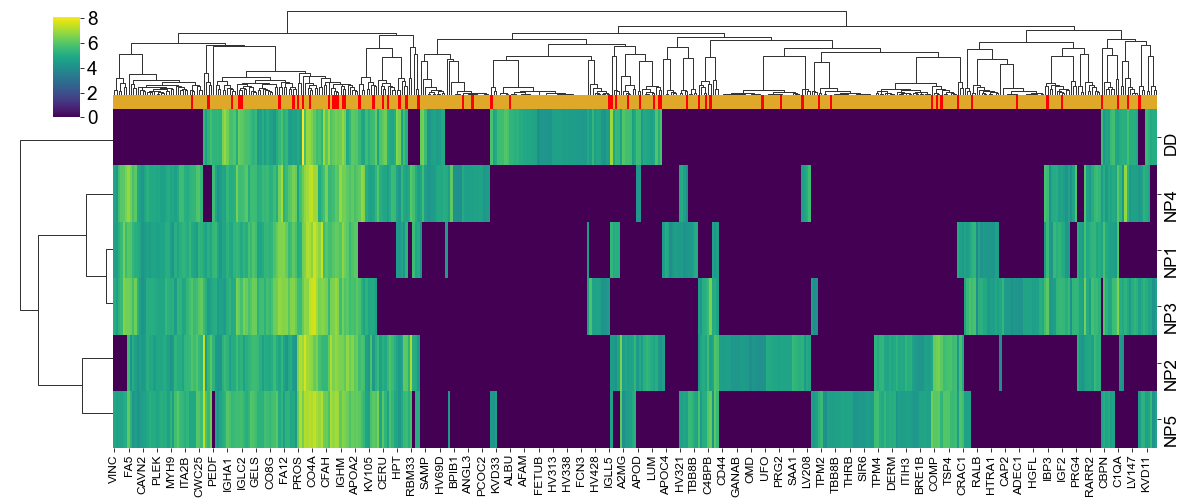

In [52]:

matplotlib.rcParams['font.family'] = "Arial"
# Map the species to colors
color_dict = {"yes": 'red', "no": '#DFA828'}

col_colors = data['Biomarkers'].map(color_dict).tolist()

# Transpose the  data to have species as columns (or x-axis observations)
data_transposed = data.drop('Biomarkers', axis=1).transpose()

# we can map the corresponding species colors to these columns
colors_transposed = dict(zip(data.index, col_colors))

# Display the transposed clustermap with colored labels on the x-axis
g=sns.clustermap(data_transposed, col_colors=data.index.map(colors_transposed), cmap='viridis',figsize=(18.7, 7), fmt=".3f",
                cbar_pos=(0.16, 0.76, 0.02, 0.20) )   #(colorbar size and position)
#g=sns.clustermap(data_transposed, cmap='viridis',figsize=(20, 7))

# 调整行树状图的线条粗细
for l in g.ax_row_dendrogram.collections:
    l.set_linewidth(1)  # 设置线宽为2.5

# 调整列树状图的线条粗细
for l in g.ax_col_dendrogram.collections:
    l.set_linewidth(1)  # 设置线宽为2.5
# Set tick label size
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=12)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=17)
#g.ax_heatmap.set_yticklabels([])
g.ax_row_dendrogram.set_position([0.126, 0.12, 0.20, 0.65])  # [x, y, width, height]
cbar = g.cax
for label in cbar.get_yticklabels():
    label.set_size(19)  # 设置字体大小为15

# 调整列树形图的大小
#g.ax_col_dendrogram.set_position([0.3, 0.9, 0.6, 0.3])  # [x, y, width, height]
fig_path= 'F:\\Seer_project\\figures\\' 
figname='heatmap_targeted_highcon'
plt.savefig(fig_path + "%s.svg" % figname,dpi=800, bbox_inches='tight')  
plt.show()

# plot heatmap of all proteins identified by scouting experiments

In [96]:
df_scout=pd.read_excel(r'F:\\Seer_project\\NPs_scout.xlsx',sheet_name="Sheet1")

In [97]:
#df_scout.set_index('Unnamed: 0',inplace=True)

In [98]:
df_scout.index=df_scout['new_index'].tolist()
df_scout

,Unnamed: 0,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,Biomarkers
THRB,THRB,NaN,NaN,4.917836,4.349819,NaN,5.900115,P00734,THRB,no
CO3,CO3,NaN,3.790649,NaN,NaN,NaN,NaN,P01024,CO3,yes
APOA1,APOA1,NaN,NaN,NaN,NaN,4.194894,NaN,P02647,APOA1,yes
FIBA,FIBA,NaN,NaN,3.907626,NaN,NaN,NaN,P02671,FIBA,yes
LV743,LV743,NaN,NaN,NaN,NaN,NaN,3.732767,P04211,LV743,no
...,...,...,...,...,...,...,...,...,...,...
HV321,HV321,5.119214,NaN,NaN,4.608127,4.738867,4.209833,P0DP04,HV321,no
HV404,HV404,4.653399,3.842820,NaN,4.709690,4.609838,NaN,P0DP08,HV404,no
H2B1K,H2B1K,NaN,4.388111,4.377766,NaN,4.323882,NaN,Q99880,H2B1K,no
POTEF,POTEF,NaN,4.399519,4.156327,4.203466,4.331807,4.431339,Q9BYX7,POTEF,no


In [99]:
data2=df_scout.drop(columns=['pro_names','new_index','Unnamed: 0'])
data2=data2.fillna(0)
data2

,DD,NP1,NP2,NP3,NP4,NP5,Biomarkers
THRB,0.000000,0.000000,4.917836,4.349819,0.000000,5.900115,no
CO3,0.000000,3.790649,0.000000,0.000000,0.000000,0.000000,yes
APOA1,0.000000,0.000000,0.000000,0.000000,4.194894,0.000000,yes
FIBA,0.000000,0.000000,3.907626,0.000000,0.000000,0.000000,yes
LV743,0.000000,0.000000,0.000000,0.000000,0.000000,3.732767,no
...,...,...,...,...,...,...,...
HV321,5.119214,0.000000,0.000000,4.608127,4.738867,4.209833,no
HV404,4.653399,3.842820,0.000000,4.709690,4.609838,0.000000,no
H2B1K,0.000000,4.388111,4.377766,0.000000,4.323882,0.000000,no
POTEF,0.000000,4.399519,4.156327,4.203466,4.331807,4.431339,no


In [100]:
dfdf2=data2.iloc[:,:6]


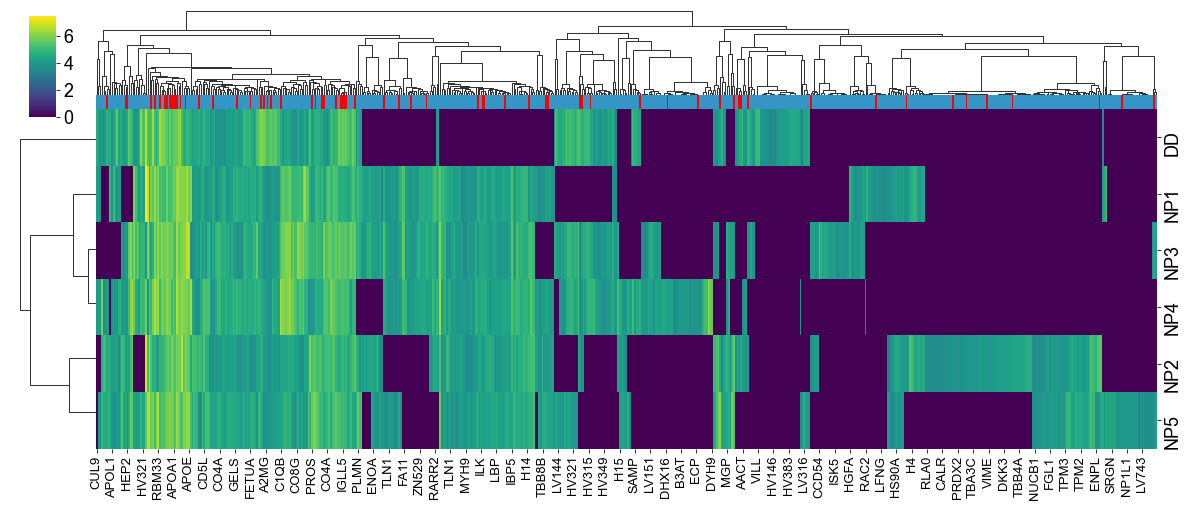

In [126]:
# Map the species to colors
color_dict2 = {"yes": 'red', "no": '#3695C7'}

col_colors2 = data2['Biomarkers'].map(color_dict2).tolist()

# Transpose the  data to have species as columns (or x-axis observations)
data_transposed2 = data2.drop('Biomarkers', axis=1).transpose()

# we can map the corresponding species colors to these columns
colors_transposed2 = dict(zip(data2.index, col_colors2))

# Display the transposed clustermap with colored labels on the x-axis
g=sns.clustermap(data_transposed2, col_colors=data2.index.map(colors_transposed2), cmap='viridis',figsize=(19, 7), fmt=".3f",
                cbar_pos=(0.156, 0.76, 0.02, 0.20) )   #(colorbar size and position)
#g=sns.clustermap(data_transposed, cmap='viridis',figsize=(20, 7))

# 调整行树状图的线条粗细
for l in g.ax_row_dendrogram.collections:
    l.set_linewidth(1)  # 设置线宽为2.5

# 调整列树状图的线条粗细
for l in g.ax_col_dendrogram.collections:
    l.set_linewidth(1)  # 设置线宽为2.5
# Set tick label size
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=13)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=18)
#g.ax_heatmap.set_yticklabels([])
g.ax_row_dendrogram.set_position([0.14, 0.12, 0.20, 0.65])  # [x, y, width, height]
cbar = g.cax
for label in cbar.get_yticklabels():
    label.set_size(18)  # 设置字体大小为15


# 调整列树形图的大小
#g.ax_col_dendrogram.set_position([0.3, 0.71, 0.6, 0.3])  # [x, y, width, height]
fig_path= 'F:\\Seer_project\\figures\\' 
figname='heatmap_nontargeted'
plt.savefig(fig_path + "%s.svg" % figname,dpi=800, bbox_inches='tight')  
plt.show()